In [1]:
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import singleCellHaystack as hs
import timeit

sc.set_figure_params(facecolor="white", dpi=90)

# Load toy data

In [2]:
adata = sc.read_h5ad("datasets/toy.h5ad")
adata

AnnData object with n_obs × n_vars = 601 × 500
    obsm: 'X_tsne'

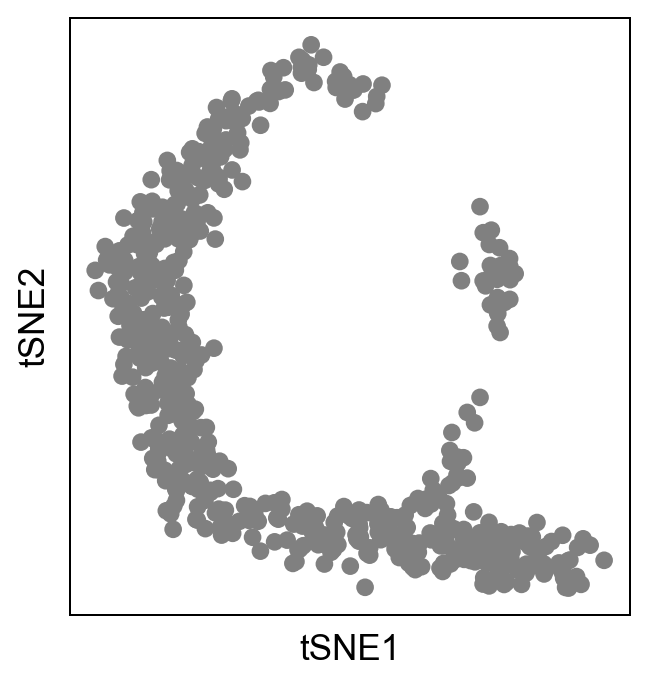

In [3]:
sc.pl.scatter(adata, basis="tsne")

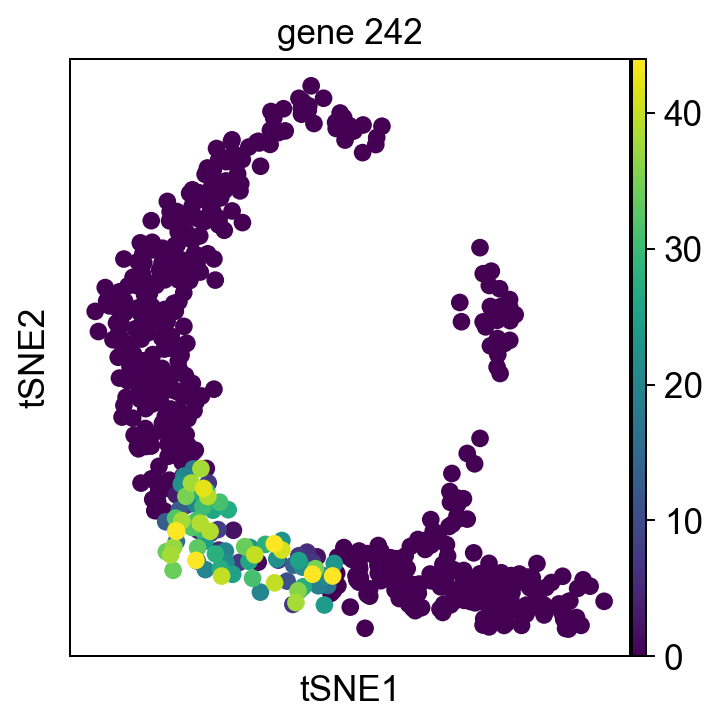

In [4]:
sc.pl.scatter(adata, basis="tsne", color="gene_242")

# Check grid points

In [5]:
gp = hs.calculate_grid_points(adata.obsm["X_tsne"], ngrid_points=100, random_state=10)
gp[1:5,:]

array([[-13.89582107,   5.03131894],
       [ -0.89247373,  28.79821646],
       [ 24.95541828,  14.27531687],
       [-10.8286497 , -10.17388678]])

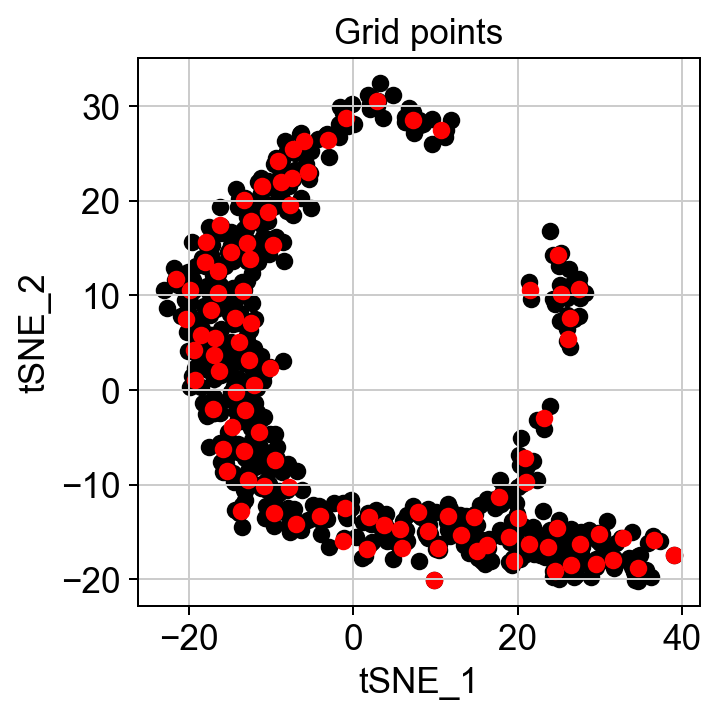

In [6]:
data = adata.obsm["X_tsne"]
plt.scatter(data[:,0], data[:,1], color="black")
plt.scatter(gp[:,0], gp[:,1], color="red")
plt.xlabel("tSNE_1")
plt.ylabel("tSNE_2")
plt.title("Grid points")
plt.show()

# Run haystack

In [7]:
#%%timeit -n 1 -r 1
res1 = hs.haystack(adata, basis="tsne", n_randomizations=100, n_genes_to_randomize=100)

> starting haystack ...
> scaling coordinates ...
> calculating feature's stds ...
> calculating grid points ...
> calculating distance to cells ...
> calculating densities ...
> calculating Q dist ...
> calculating KLD for 500 genes ...


100%|████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 6865.31it/s]


> calculating feature's CV ...
> selecting genes to randomize ...
> calculating randomized KLD ...


100%|██████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 92.57it/s]


> calculating P values ...
> done.


In [8]:
sum1 = res1["results"]
sum1.sort_values("KLD", ascending=False).head(10)

,gene,KLD,pval,pval_adj,logpval,logpval_adj
233,gene_234,3.348271,2.030367e-12,1.015184e-09,-11.692425,-8.993455
487,gene_488,3.241699,2.003980e-14,1.001990e-11,-13.698107,-10.999137
175,gene_176,3.227830,1.025866e-14,5.129328e-12,-13.988910,-11.289940
224,gene_225,3.011564,1.769736e-13,8.848680e-11,-12.752092,-10.053122
448,gene_449,3.005086,3.302833e-13,1.651416e-10,-12.481113,-9.782143
228,gene_229,2.996505,2.005129e-08,1.002564e-05,-7.697858,-4.998888
8,gene_9,2.918151,1.806752e-10,9.033762e-08,-9.743101,-7.044131
77,gene_78,2.805733,7.921610e-22,3.960805e-19,-21.101187,-18.402217
290,gene_291,2.775496,2.611803e-19,1.305902e-16,-18.583060,-15.884090
215,gene_216,2.762210,2.207052e-15,1.103526e-12,-14.656187,-11.957217


In [9]:
sum[sum.gene.isin(["gene_242", "gene_497", "gene_79"])]

,gene,KLD,pval,pval_adj,logpval,logpval_adj
78,gene_79,2.207581,2.508953e-37,1.254477e-34,-36.600507,-33.901537
241,gene_242,1.816583,1.273481e-36,6.367407e-34,-35.895007,-33.196037
496,gene_497,1.807536,3.971090e-33,1.985545e-30,-32.401090,-29.702120


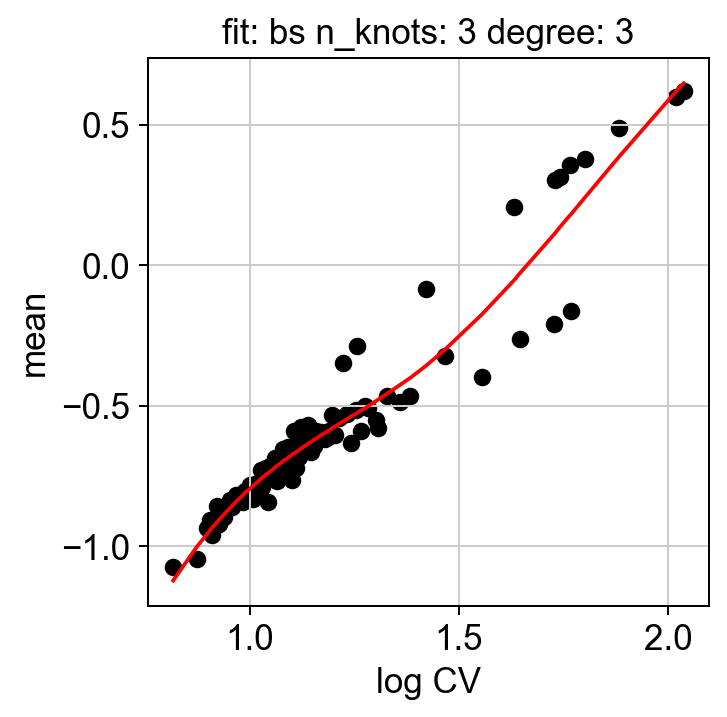

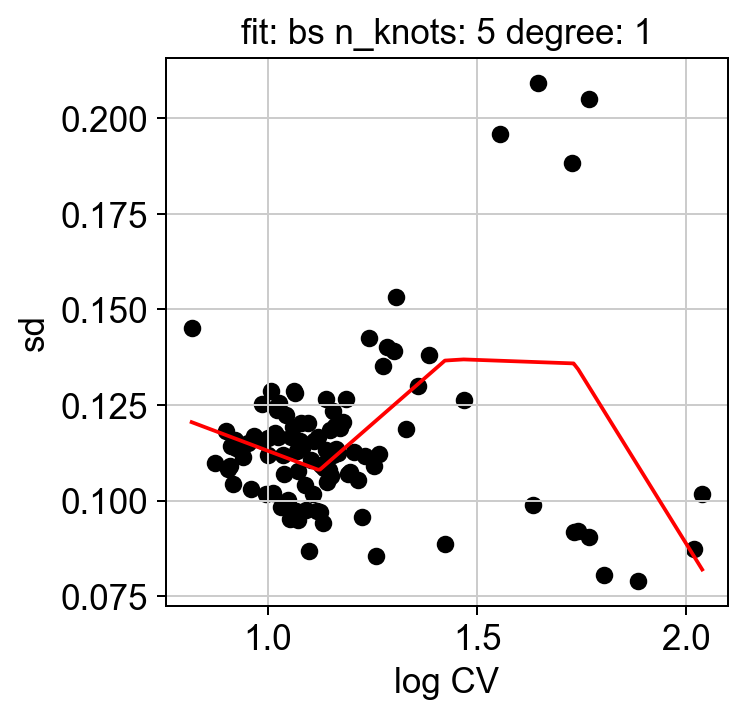

In [10]:
hs.plot_rand_fit(res, "mean")
hs.plot_rand_fit(res, "sd")

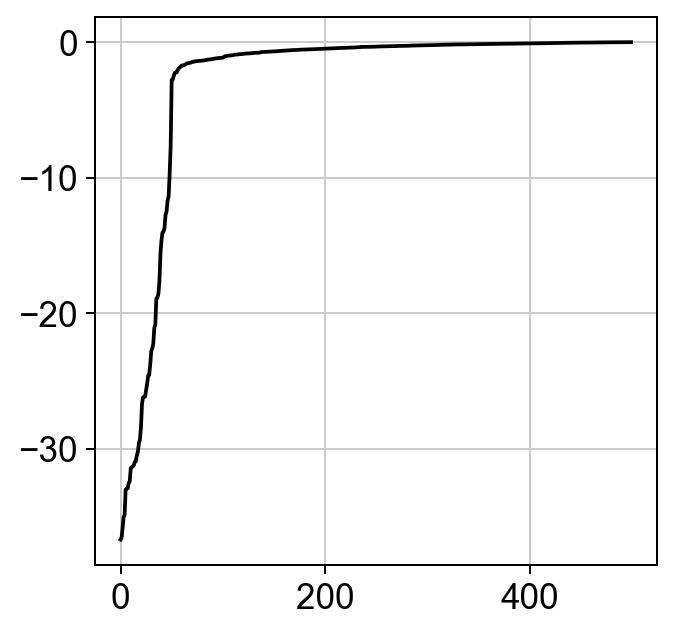

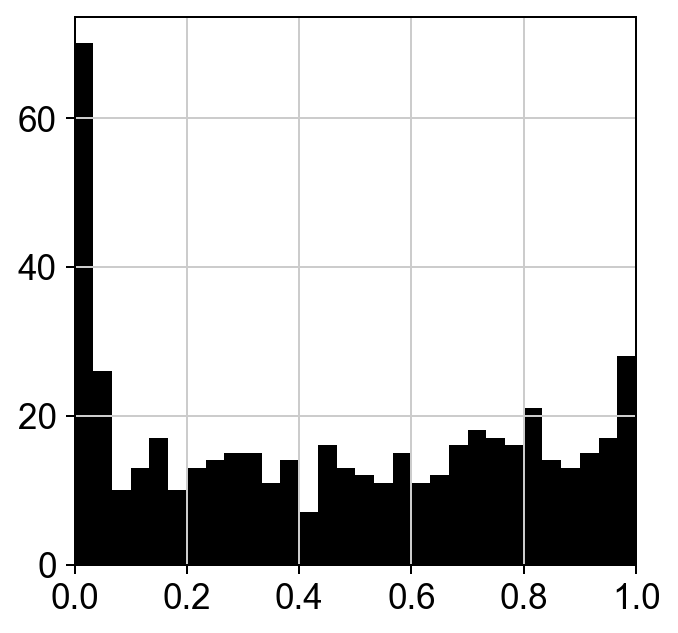

In [11]:
hs.plot_pval_rank(res)
hs.plot_pval_hist(res)

In [12]:
sum.to_csv("test_toy_results.tsv")

In [13]:
res2 = hs.haystack(adata, grid_points=gp, basis="tsne", n_randomizations=100, n_genes_to_randomize=100)

> starting haystack ...
> scaling coordinates ...
> calculating feature's stds ...
> calculating distance to cells ...
> calculating densities ...
> calculating Q dist ...
> calculating KLD for 500 genes ...


100%|████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 7395.46it/s]


> calculating feature's CV ...
> selecting genes to randomize ...
> calculating randomized KLD ...


100%|█████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 109.10it/s]


> calculating P values ...
> done.


In [14]:
res2["info"]["grid_points"][0:4,:]

array([[ 16.23854623, -16.43297725],
       [-13.89582107,   5.03131894],
       [ -0.89247373,  28.79821646],
       [ 24.95541828,  14.27531687]])

In [15]:
gp[0:4,:]

array([[ 16.23854623, -16.43297725],
       [-13.89582107,   5.03131894],
       [ -0.89247373,  28.79821646],
       [ 24.95541828,  14.27531687]])

In [16]:
sum2 = res2["results"]
sum2

,gene,KLD,pval,pval_adj,logpval,logpval_adj
290,gene_291,4.685398e-02,0.000016,0.007883,-4.802286,-2.103316
154,gene_155,2.954379e-02,0.000023,0.011440,-4.640553,-1.941583
496,gene_497,1.873313e-02,0.000073,0.036308,-4.138973,-1.440003
136,gene_137,1.810979e-02,0.000078,0.039126,-4.106499,-1.407529
58,gene_59,2.123062e-02,0.000080,0.040014,-4.096763,-1.397793
...,...,...,...,...,...,...
284,gene_285,2.123470e-06,0.999282,1.000000,-0.000312,0.000000
393,gene_394,7.819663e-07,0.999618,1.000000,-0.000166,0.000000
49,gene_50,2.025114e-06,0.999669,1.000000,-0.000144,0.000000
225,gene_226,1.455747e-06,0.999755,1.000000,-0.000106,0.000000


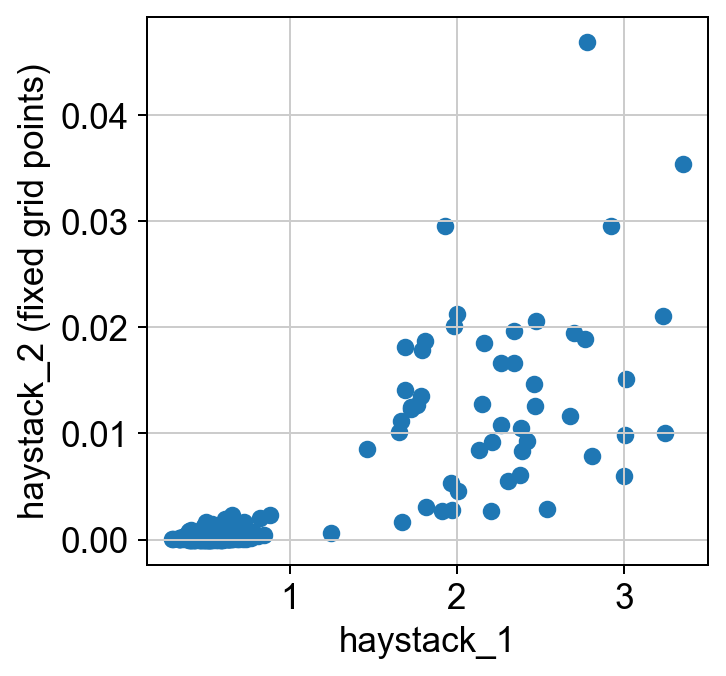

In [24]:
plt.scatter(sum.sort_values("gene").KLD, sum2.sort_values("gene").KLD)
plt.xlabel("haystack_1")
plt.ylabel("haystack_2 (fixed grid points)")
plt.show()

In [18]:
res3 = hs.haystack(adata, grid_points=gp, basis="tsne", n_randomizations=100, n_genes_to_randomize=100)

> starting haystack ...
> scaling coordinates ...
> calculating feature's stds ...
> calculating distance to cells ...
> calculating densities ...
> calculating Q dist ...
> calculating KLD for 500 genes ...


100%|████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 7920.42it/s]


> calculating feature's CV ...
> selecting genes to randomize ...
> calculating randomized KLD ...


100%|█████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 100.96it/s]


> calculating P values ...
> done.


In [19]:
sum3 = res2["results"]
sum3

,gene,KLD,pval,pval_adj,logpval,logpval_adj
290,gene_291,4.685398e-02,0.000016,0.007883,-4.802286,-2.103316
154,gene_155,2.954379e-02,0.000023,0.011440,-4.640553,-1.941583
496,gene_497,1.873313e-02,0.000073,0.036308,-4.138973,-1.440003
136,gene_137,1.810979e-02,0.000078,0.039126,-4.106499,-1.407529
58,gene_59,2.123062e-02,0.000080,0.040014,-4.096763,-1.397793
...,...,...,...,...,...,...
284,gene_285,2.123470e-06,0.999282,1.000000,-0.000312,0.000000
393,gene_394,7.819663e-07,0.999618,1.000000,-0.000166,0.000000
49,gene_50,2.025114e-06,0.999669,1.000000,-0.000144,0.000000
225,gene_226,1.455747e-06,0.999755,1.000000,-0.000106,0.000000


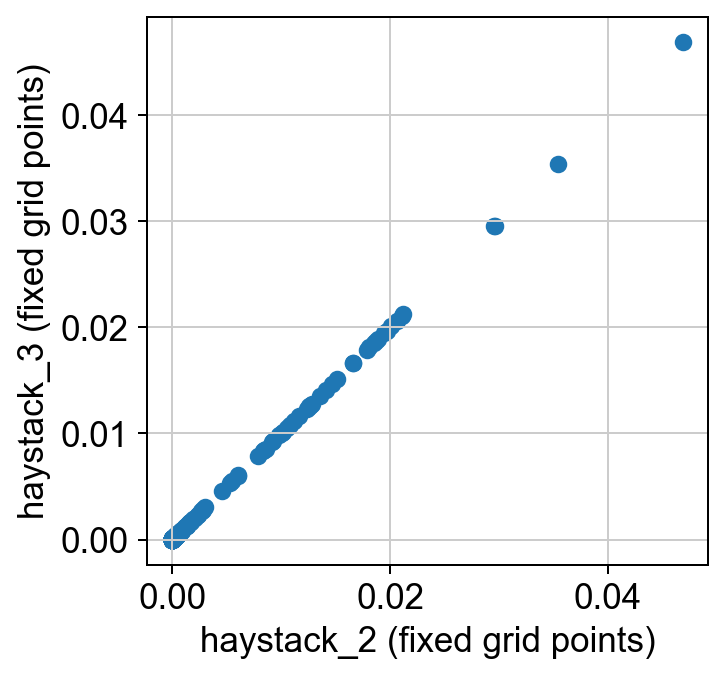

In [20]:
plt.scatter(sum2.KLD, sum3.KLD)
plt.xlabel("haystack_2 (fixed grid points)")
plt.ylabel("haystack_3 (fixed grid points)")
plt.show()

In [21]:
import pandas as pd
gp_d = pd.DataFrame(gp, columns=["tSNE_1", "tSNE_2"])
gp_d

,tSNE_1,tSNE_2
0,16.238546,-16.432977
1,-13.895821,5.031319
2,-0.892474,28.798216
3,24.955418,14.275317
4,-10.828650,-10.173887
...,...,...
95,-19.386493,4.193683
96,23.696550,-16.614308
97,-5.961685,26.302505
98,-5.476371,23.038406


In [22]:
gp_d.to_csv("test_toy_grid.coord.tsv", sep="\t")

In [23]:
sum2.to_csv("test_toy_results_fixed_coord.tsv")